In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### não uso

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
glp_2004 = pd.read_csv('anos_concatenados/glp_2004.csv')
glp_2004['Ano'] = 2004
glp_2005 = pd.read_csv('anos_concatenados/glp_2005.csv')
glp_2005['Ano'] = 2005
glp_2006 = pd.read_csv('anos_concatenados/glp_2006.csv')
glp_2006['Ano'] = 2006
glp_2007 = pd.read_csv('anos_concatenados/glp_2007.csv')
glp_2007['Ano'] = 2007
glp_2008 = pd.read_csv('anos_concatenados/glp_2008.csv')
glp_2008['Ano'] = 2008
glp_2009 = pd.read_csv('anos_concatenados/glp_2009.csv')
glp_2009['Ano'] = 2009
glp2010 = pd.read_csv('anos_concatenados/glp_2010.csv')
glp2010['Ano'] = 2010

In [35]:
glp_2011 = pd.read_csv('anos_concatenados/glp_2011.csv')
glp_2011['Ano'] = 2011
glp_2012 = pd.read_csv('anos_concatenados/glp_2012.csv')
glp_2012['Ano'] = 2012
glp_2013 = pd.read_csv('anos_concatenados/glp_2013.csv')
glp_2013['Ano'] = 2013
glp_2014 = pd.read_csv('anos_concatenados/glp_2014.csv')
glp_2014['Ano'] = 2014
glp_2015 = pd.read_csv('anos_concatenados/glp_2015.csv')
glp_2015['Ano'] = 2015
glp_2016 = pd.read_csv('anos_concatenados/glp_2016.csv')
glp_2016['Ano'] = 2016
glp_2017 = pd.read_csv('anos_concatenados/glp_2017.csv')
glp_2017['Ano'] = 2017
glp_2018 = pd.read_csv('anos_concatenados/glp_2018.csv')
glp_2018['Ano'] = 2018
glp_2019 = pd.read_csv('anos_concatenados/glp_2019.csv')
glp_2019['Ano'] = 2019

In [36]:
glp_2020 = pd.read_csv('anos_concatenados/glp_2020.csv')
glp_2020['Ano'] = 2020
glp_2021 = pd.read_csv('anos_concatenados/glp_2021.csv')
glp_2021['Ano'] = 2021
glp_2022 = pd.read_csv('anos_concatenados/glp_2022.csv')
glp_2022['Ano'] = 2022
glp_2023 = pd.read_csv('anos_concatenados/glp_2023.csv')
glp_2023['Ano'] = 2023

In [37]:
todos_anos = pd.concat([glp_2004, glp_2005, glp_2006, glp_2007, glp_2008, glp_2009, glp2010, 
                        glp_2011, glp_2012, glp_2013, glp_2014, glp_2015, glp_2016, glp_2017, 
                        glp_2018, glp_2019, glp_2020, glp_2021, glp_2022, glp_2023])

In [38]:
todos_anos.to_csv('todos_anos.csv', index=False)

#### uso

In [39]:
todos_anos_pd = pd.read_csv('todos_anos.csv')

In [40]:
todos_anos_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858378 entries, 0 to 5858377
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Regiao - Sigla     object 
 1   Estado - Sigla     object 
 2   Municipio          object 
 3   Revenda            object 
 4   CNPJ da Revenda    object 
 5   Nome da Rua        object 
 6   Numero Rua         object 
 7   Complemento        object 
 8   Bairro             object 
 9   Cep                object 
 10  Produto            object 
 11  Data da Coleta     object 
 12  Valor de Venda     float64
 13  Valor de Compra    float64
 14  Unidade de Medida  object 
 15  Bandeira           object 
 16  Ano                int64  
dtypes: float64(2), int64(1), object(14)
memory usage: 759.8+ MB


In [41]:
todos_anos_pd['Produto'].unique() 

array(['GLP'], dtype=object)

In [42]:
produto_glp = todos_anos_pd[['Ano','Produto', 'Valor de Venda']]

In [43]:
produto_glp.head()

,Ano,Produto,Valor de Venda
0,2004,GLP,29.8
1,2004,GLP,30.0
2,2004,GLP,28.0
3,2004,GLP,35.0
4,2004,GLP,31.9


In [44]:
ma = produto_glp.groupby('Ano')['Valor de Venda'].mean()
media_ano_glp = pd.DataFrame({'Ano': ma.index, 'Valor de Venda': ma.values})

In [45]:
dolar = pd.read_csv('Dolar ao longo dos anos .csv')

In [46]:
a = ['Ano', 'Média']
dolar_media_ano = dolar[a]

In [47]:
glp_dolar = pd.merge(media_ano_glp, dolar_media_ano, on='Ano')
glp_dolar['Média'] = glp_dolar['Média'].str.replace(',', '.').astype(float)
glp_dolar['Média'].round(2)
glp_dolar.to_csv('glp_dolar.csv', index=False)

In [48]:
glpd = pd.read_csv('glp_dolar.csv')

In [49]:
glpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             20 non-null     int64  
 1   Valor de Venda  20 non-null     float64
 2   Média           20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 612.0 bytes


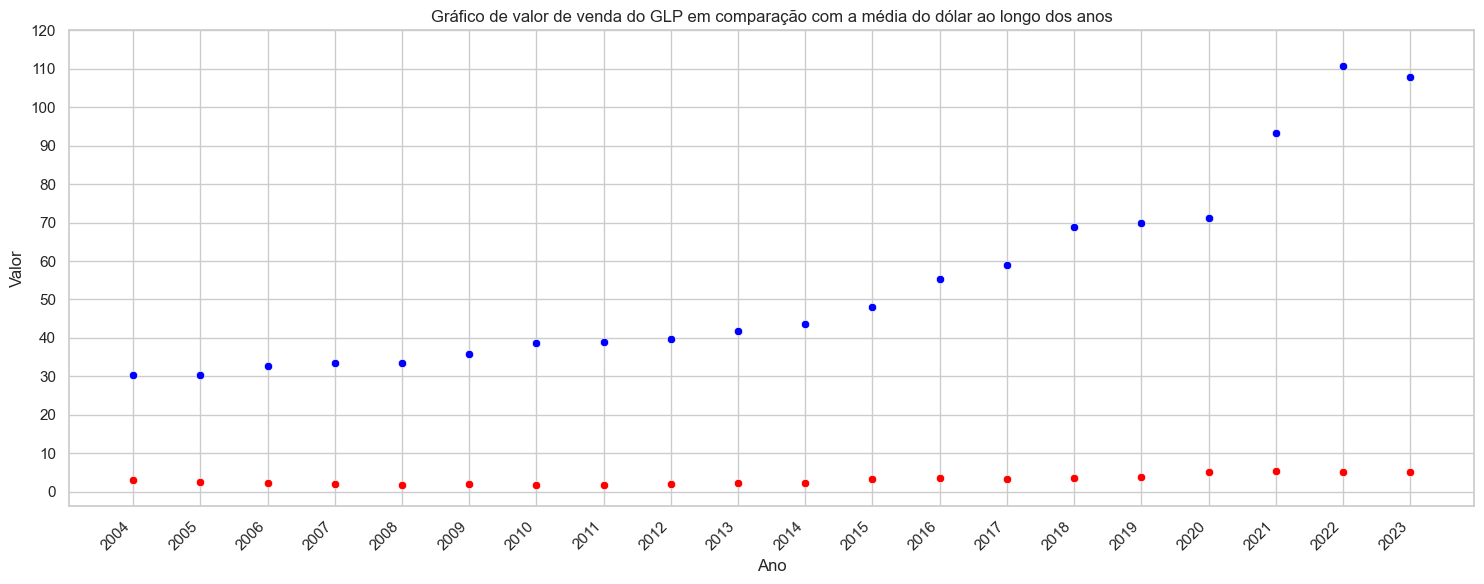

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', data=glpd, color='blue') # média do valor de venda do glp
sns.scatterplot(x='Ano', y='Média', data=glpd, color='red') # média do dólar
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gráfico de valor de venda do GLP em comparação com a média do dólar ao longo dos anos')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.yticks(range(0, 125, 10))
plt.tight_layout()
plt.show()

In [51]:
bandeira_glp = todos_anos_pd[['Ano','Produto', 'Bandeira', 'Valor de Venda']]

In [56]:
bandeira_glp.to_csv('indices_glp.csv', index=False)

In [52]:
glp_b = bandeira_glp.groupby(['Bandeira', 'Ano'])['Valor de Venda'].mean().reset_index()

In [53]:
contagem_bandeiras = glp_b['Bandeira'].value_counts()
contagem_bandeiras

Bandeira
BRANCA                          20
MINASGAS                         5
FOGAS                            5
NACIONAL GÁS BUTANO              5
AMAZONGÁS                        5
LIQUIGÁS                         5
SERVGÁS                          5
SUPERGASBRAS                     5
SUPERGASBRAS ENERGIA             5
CONSIGAZ                         5
BAHIANA                          5
ULTRAGAZ                         5
COPAGAZ                          4
NGC DISTRIBUIDORA                3
PETROBRAS DISTRIBUIDORA S.A.     2
SABBÁ                            2
RAIZEN                           2
ALESAT                           2
NUTRIGÁS S/A                     2
MAXI CHAMA                       2
IPIRANGA                         2
COPA ENERGIA                     2
POTENCIAL                        1
RAIZEN MIME                      1
GASBALL                          1
SP                               1
FEDERAL                          1
ATEM' S                          1
VIBRA ENERG

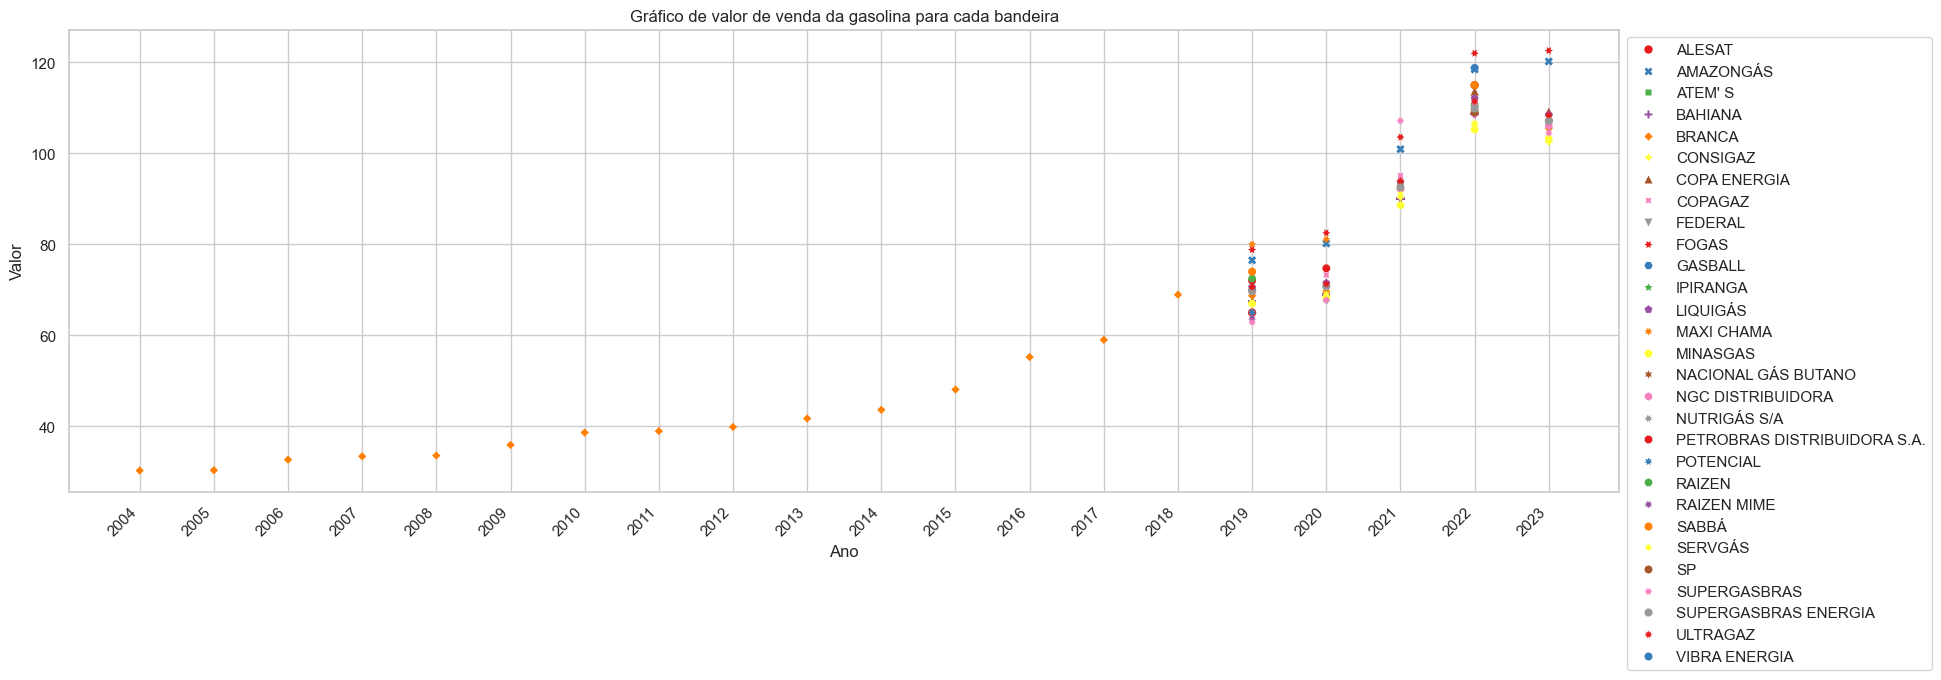

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', hue='Bandeira', style='Bandeira', markers=True, data=glp_b, palette='Set1', edgecolor='none')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gráfico de valor de venda da gasolina para cada bandeira')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()